In [31]:
import numpy as np
seed = 42
np.random.seed(seed)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import PredefinedSplit,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# import yolo outputs DONE
# import mobilenet outputs DONE
# import densenet outputs 

In [9]:
m_mobilenet_train = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2/m_mobilenet_train.csv").drop(columns=['Unnamed: 0'])
m_mobilenet_val = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2/m_mobilenet_val.csv").drop(columns=['Unnamed: 0'])
m_mobilenet_test = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2/m_mobilenet_test.csv").drop(columns=['Unnamed: 0'])

In [10]:
m_mobilenet_train.rename(columns = {'FileName': 'FilePath'}, inplace=True)
m_mobilenet_val.rename(columns = {'FileName': 'FilePath'}, inplace=True)
m_mobilenet_test.rename(columns = {'FileName': 'FilePath'}, inplace=True)

In [11]:
m_yolov8_train = pd.read_csv("/kaggle/input/koa-yolov8-preds/m_yolov8_train.csv").drop(columns=['Unnamed: 0'])
m_yolov8_val = pd.read_csv("/kaggle/input/koa-yolov8-preds/m_yolov8_val.csv").drop(columns=['Unnamed: 0'])
m_yolov8_test = pd.read_csv("/kaggle/input/koa-yolov8-preds/m_yolov8_test.csv").drop(columns=['Unnamed: 0'])

In [12]:
m_densenet_train = pd.read_csv("/kaggle/input/koa-densenet-preds/m_densenet_train.csv").drop(columns=['Unnamed: 0'])
m_densenet_val = pd.read_csv("/kaggle/input/koa-densenet-preds/m_densenet_val.csv").drop(columns=['Unnamed: 0'])
m_densenet_test = pd.read_csv("/kaggle/input/koa-densenet-preds/m_densenet_test.csv").drop(columns=['Unnamed: 0'])

In [13]:
m_densenet_train.rename(columns = {'FileName': 'FilePath'}, inplace=True)
m_densenet_val.rename(columns = {'FileName': 'FilePath'}, inplace=True)
m_densenet_test.rename(columns = {'FileName': 'FilePath'}, inplace=True)

In [14]:
train = (m_mobilenet_train.merge(m_yolov8_train)).merge(m_densenet_train)
val = (m_mobilenet_val.merge(m_yolov8_val)).merge(m_densenet_val)
test = (m_mobilenet_test.merge(m_yolov8_test)).merge(m_densenet_test)

In [15]:
X_train = train[['m_0', 'm_1', 'm_2', 'm_3', 'm_4', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4','d_0', 'd_1', 'd_2', 'd_3', 'd_4']]
X_val = val[['m_0', 'm_1', 'm_2', 'm_3', 'm_4', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4','d_0', 'd_1', 'd_2', 'd_3', 'd_4']]
X_test = test[['m_0', 'm_1', 'm_2', 'm_3', 'm_4', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4','d_0', 'd_1', 'd_2', 'd_3', 'd_4']]
y_train = train[['y_true']]
y_val = val[['y_true']]
y_test = test[['y_true']]

In [16]:
#create new a knn model
knn = KNeighborsClassifier()

In [17]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0).ravel()
pds = PredefinedSplit(test_fold = split_index)

In [18]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}

In [19]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(estimator = knn, param_grid = param_grid, cv=pds,n_jobs = -1)


In [20]:
#fit model to data
knn_gscv.fit(X,y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [21]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=6)

In [22]:
k_values = [i for i in range (1,15)]
scores = []
scores1 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    score = accuracy_score(y_val,knn.predict(X_val))
    score1 = accuracy_score(y_test,knn.predict(X_test))
    scores.append(score)
    scores1.append(score1)

Text(0, 0.5, 'Accuracy')

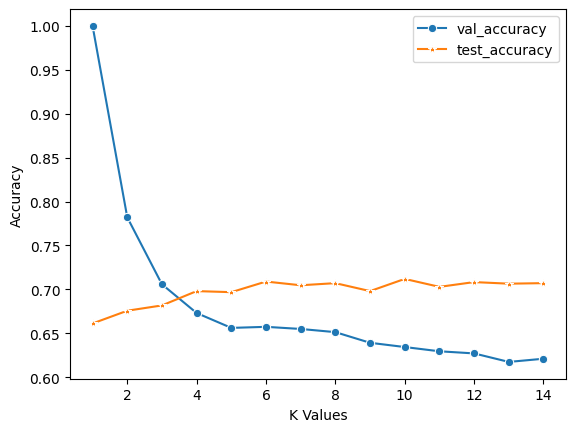

In [30]:
sns.lineplot(x = k_values, y = scores, marker = 'o',label = 'val_accuracy')
sns.lineplot(x = k_values, y = scores1, marker = '*',label = 'test_accuracy')
plt.xlabel("K Values")
plt.ylabel("Accuracy")

In [25]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [26]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [38]:
print("Testing on training set:")
print("Accuracy: ", accuracy_score(y_train,knn.predict(X_train)).round(3))
print("Balanced Accuracy Score: ",balanced_accuracy_score(y_train,knn.predict(X_train)).round(3))
print("AUC:", roc_auc_score(y_train,knn.predict_proba(X_train),multi_class='ovr').round(3))

Testing on training set:
Accuracy:  0.879
Balanced Accuracy Score:  0.89
AUC: 0.982


In [39]:
print("Testing on validation set:")
print("Accuracy: ", accuracy_score(y_val,knn.predict(X_val)).round(3))
print("Balanced Accuracy Score: ",balanced_accuracy_score(y_val,knn.predict(X_val)).round(3))
print("AUC:", roc_auc_score(y_val,knn.predict_proba(X_val),multi_class='ovr').round(3))

Testing on validation set:
Accuracy:  0.657
Balanced Accuracy Score:  0.658
AUC: 0.919


In [40]:
print("Testing on testing set:")
print("Accuracy: ", accuracy_score(y_test,knn.predict(X_test)).round(3))
print("Balanced Accuracy Score: ",balanced_accuracy_score(y_test,knn.predict(X_test)).round(3))
print("AUC:", roc_auc_score(y_test,knn.predict_proba(X_test),multi_class='ovr').round(3))

Testing on testing set:
Accuracy:  0.709
Balanced Accuracy Score:  0.73
AUC: 0.875
